# Exploratory data analysis using supermarket sales data

In [60]:
# loading libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
#loading data
data=pd.read_csv(r"D:\EDA\Task 2\supermarket_sales - Sheet1.csv")

In [62]:
#first 5 row of the data
data.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

This dataset contains 1000 rows and 17 columns

In [64]:
data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [65]:
#dropping unnecessary column
data.drop(columns='Invoice ID',inplace=True)

In [66]:
#checking missing values
data.isna().sum()

Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [67]:
#summary statistics table of the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,2.649463e+01,10.080000,32.875000,55.230000,77.935000,99.960000
Quantity,1000.0,5.510000,2.923431e+00,1.000000,3.000000,5.000000,8.000000,10.000000
Tax 5%,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Total,1000.0,322.966749,2.458853e+02,10.678500,124.422375,253.848000,471.350250,1042.650000
cogs,1000.0,307.587380,2.341765e+02,10.170000,118.497500,241.760000,448.905000,993.000000
gross margin percentage,1000.0,4.761905,6.131498e-14,4.761905,4.761905,4.761905,4.761905,4.761905
gross income,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Rating,1000.0,6.972700,1.718580e+00,4.000000,5.500000,7.000000,8.500000,10.000000


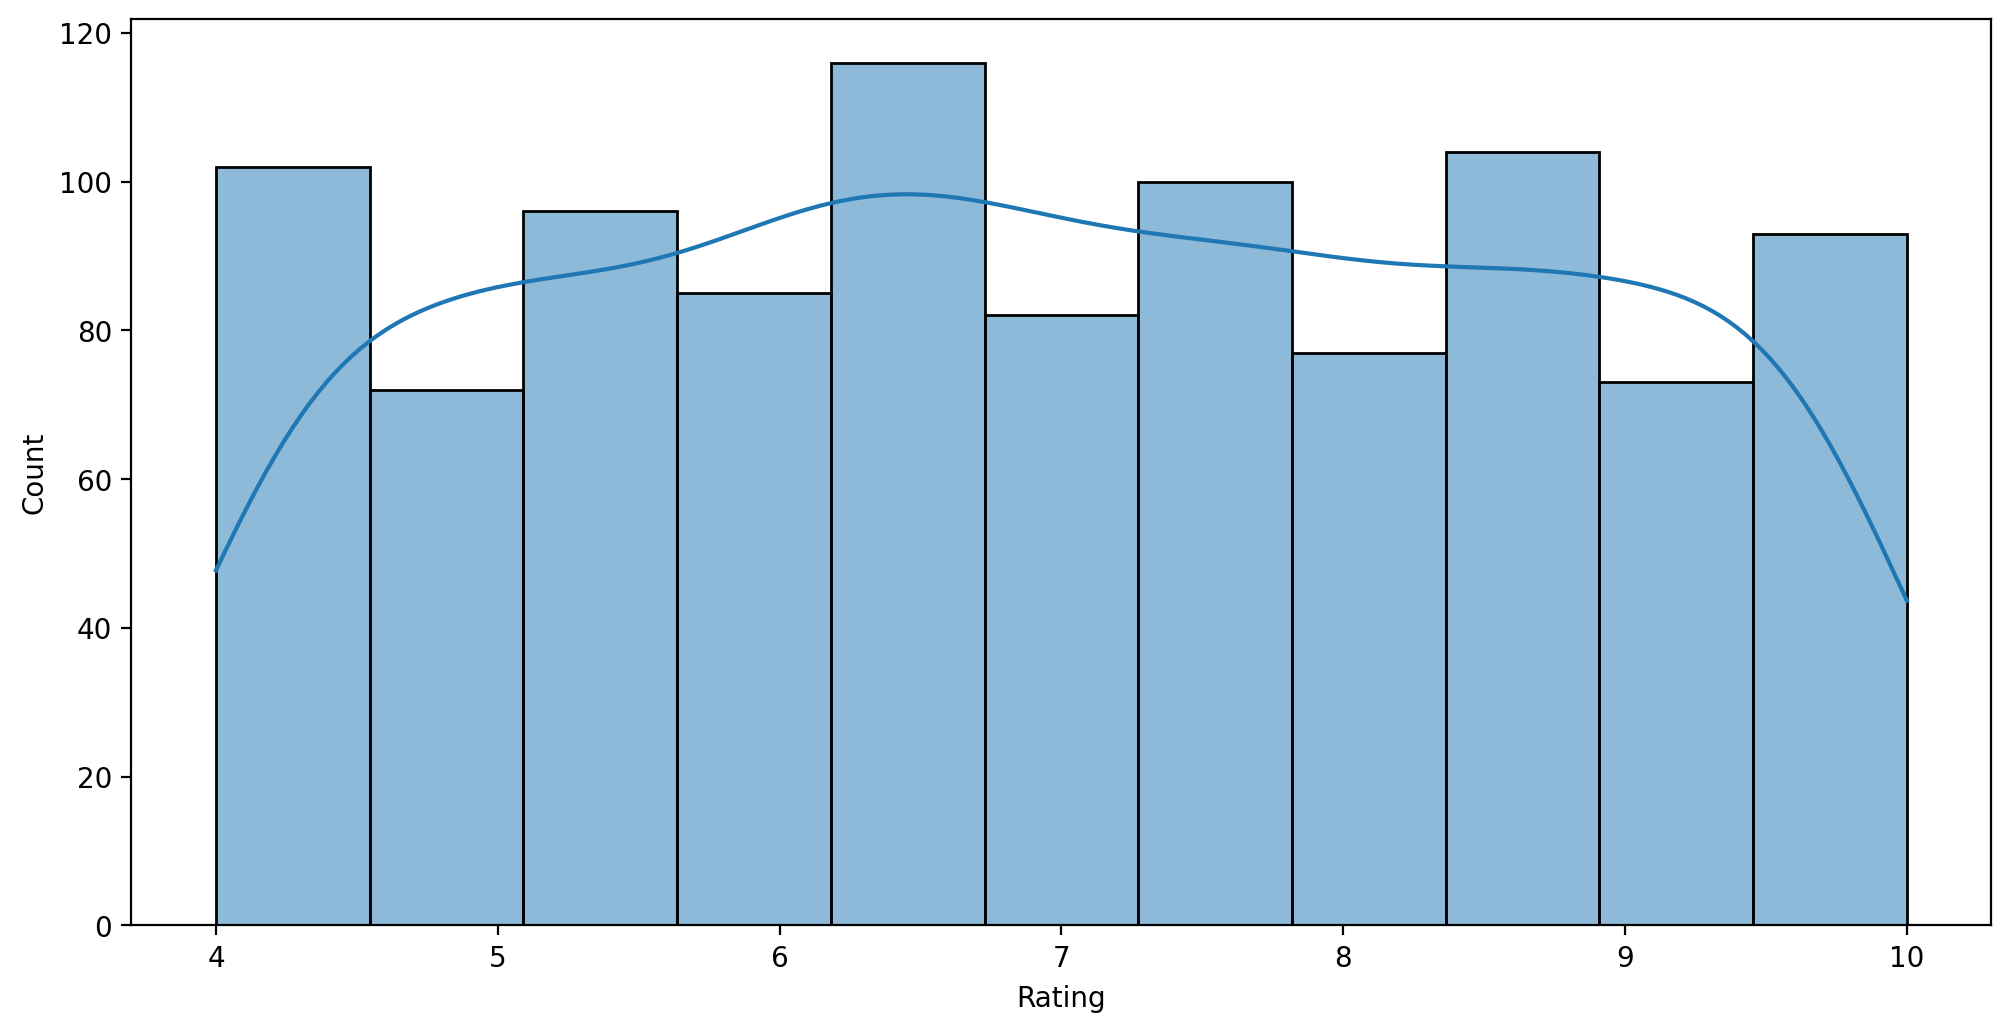

In [68]:
# Generates a histogram with a KDE plot overlaid
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data["Rating"],kde=True)
plt.show()

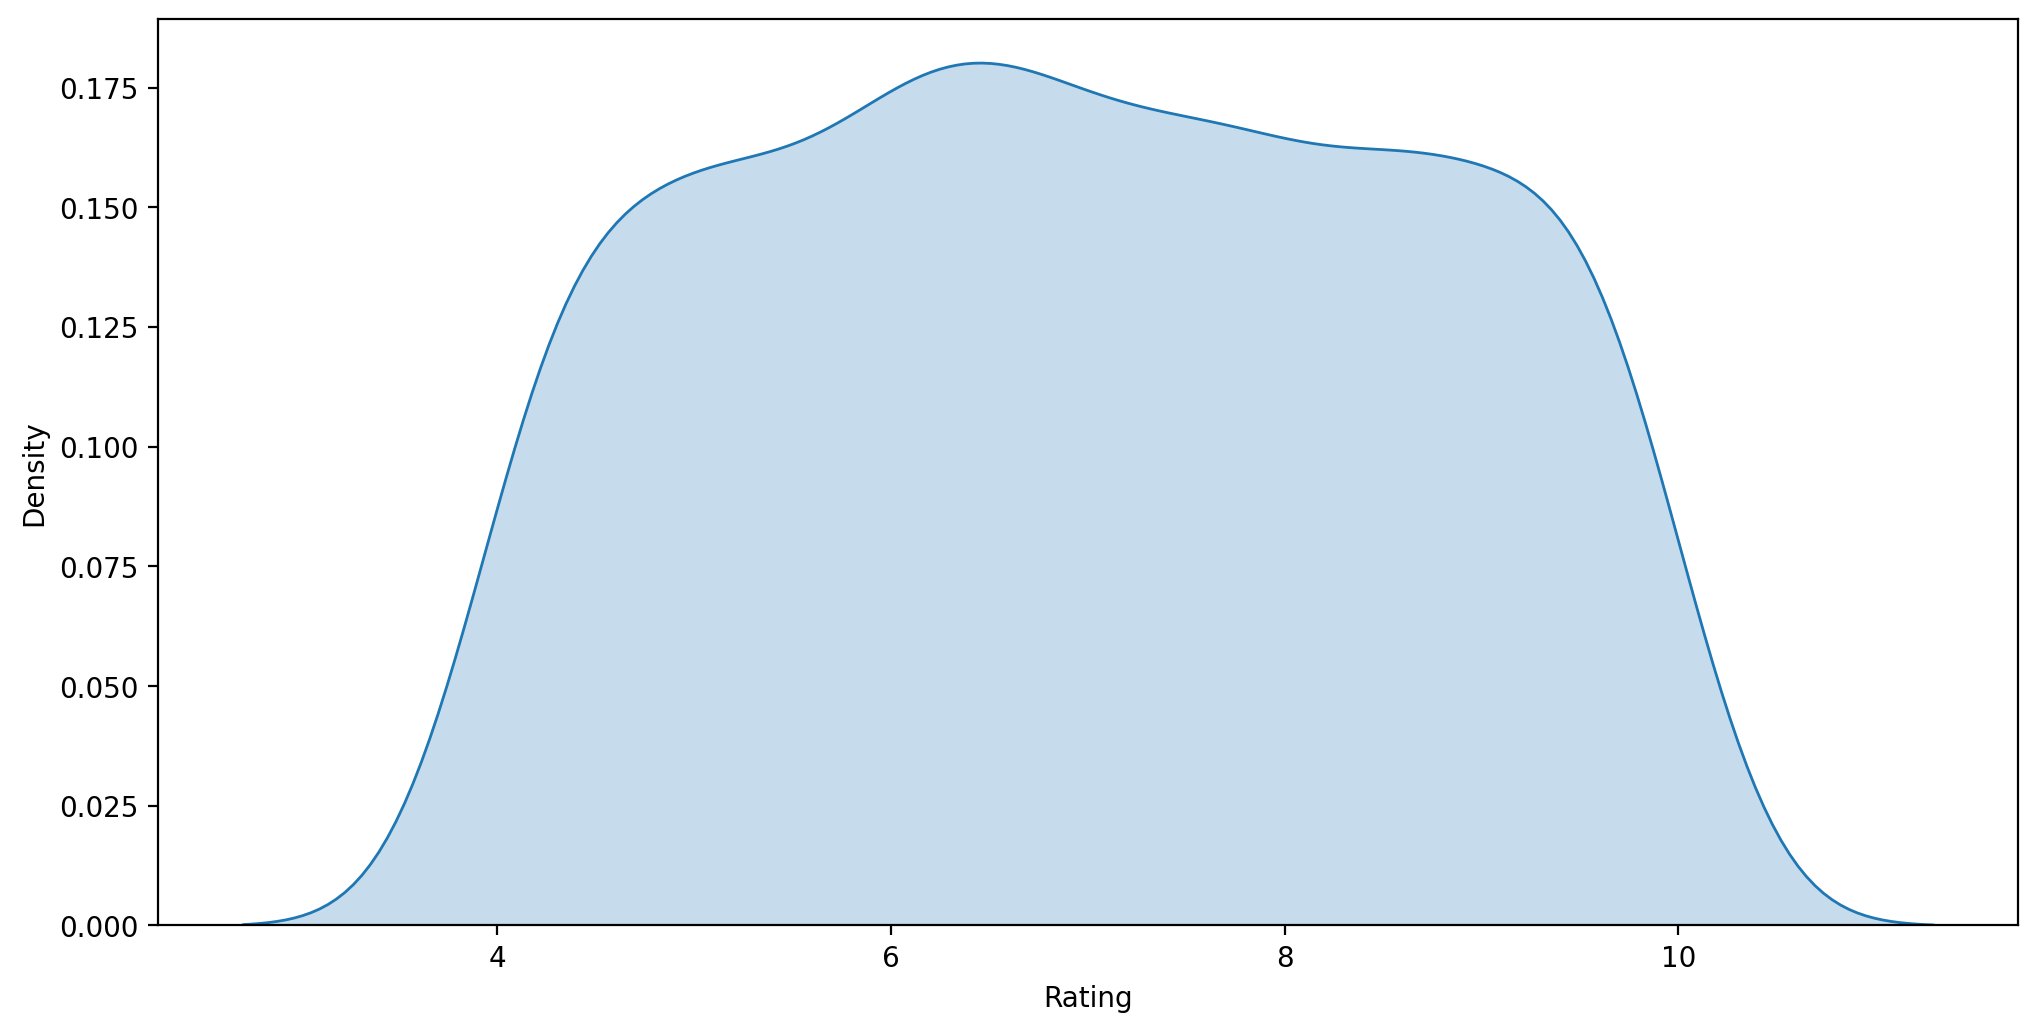

In [69]:
# Generates a KDE plot with shaded area under the curve
plt.figure(figsize=(12,6),dpi=200)
sns.kdeplot(data["Rating"],shade=True)
plt.show()

In [70]:
## Calculates the skewness of the 'Rating' column
data['Rating'].skew()

0.00900964876573073

- Most of the customer rating lies between 6 and 7 
- From the kde plot and skewness value we can conclude that customer rating distribution is nearly Symmetrical.average rating across products is approximately 7 
 
   

In [71]:
#calculate the number of unique branches
data['Branch'].nunique()

3

we have 3 different branches 

In [72]:
# sum of  sales across different  branches
TotalSales=data.groupby(['Branch']).sum()['Total']
TotalSales

Branch
A    106200.3705
B    106197.6720
C    110568.7065
Name: Total, dtype: float64

<AxesSubplot:xlabel='Branch'>

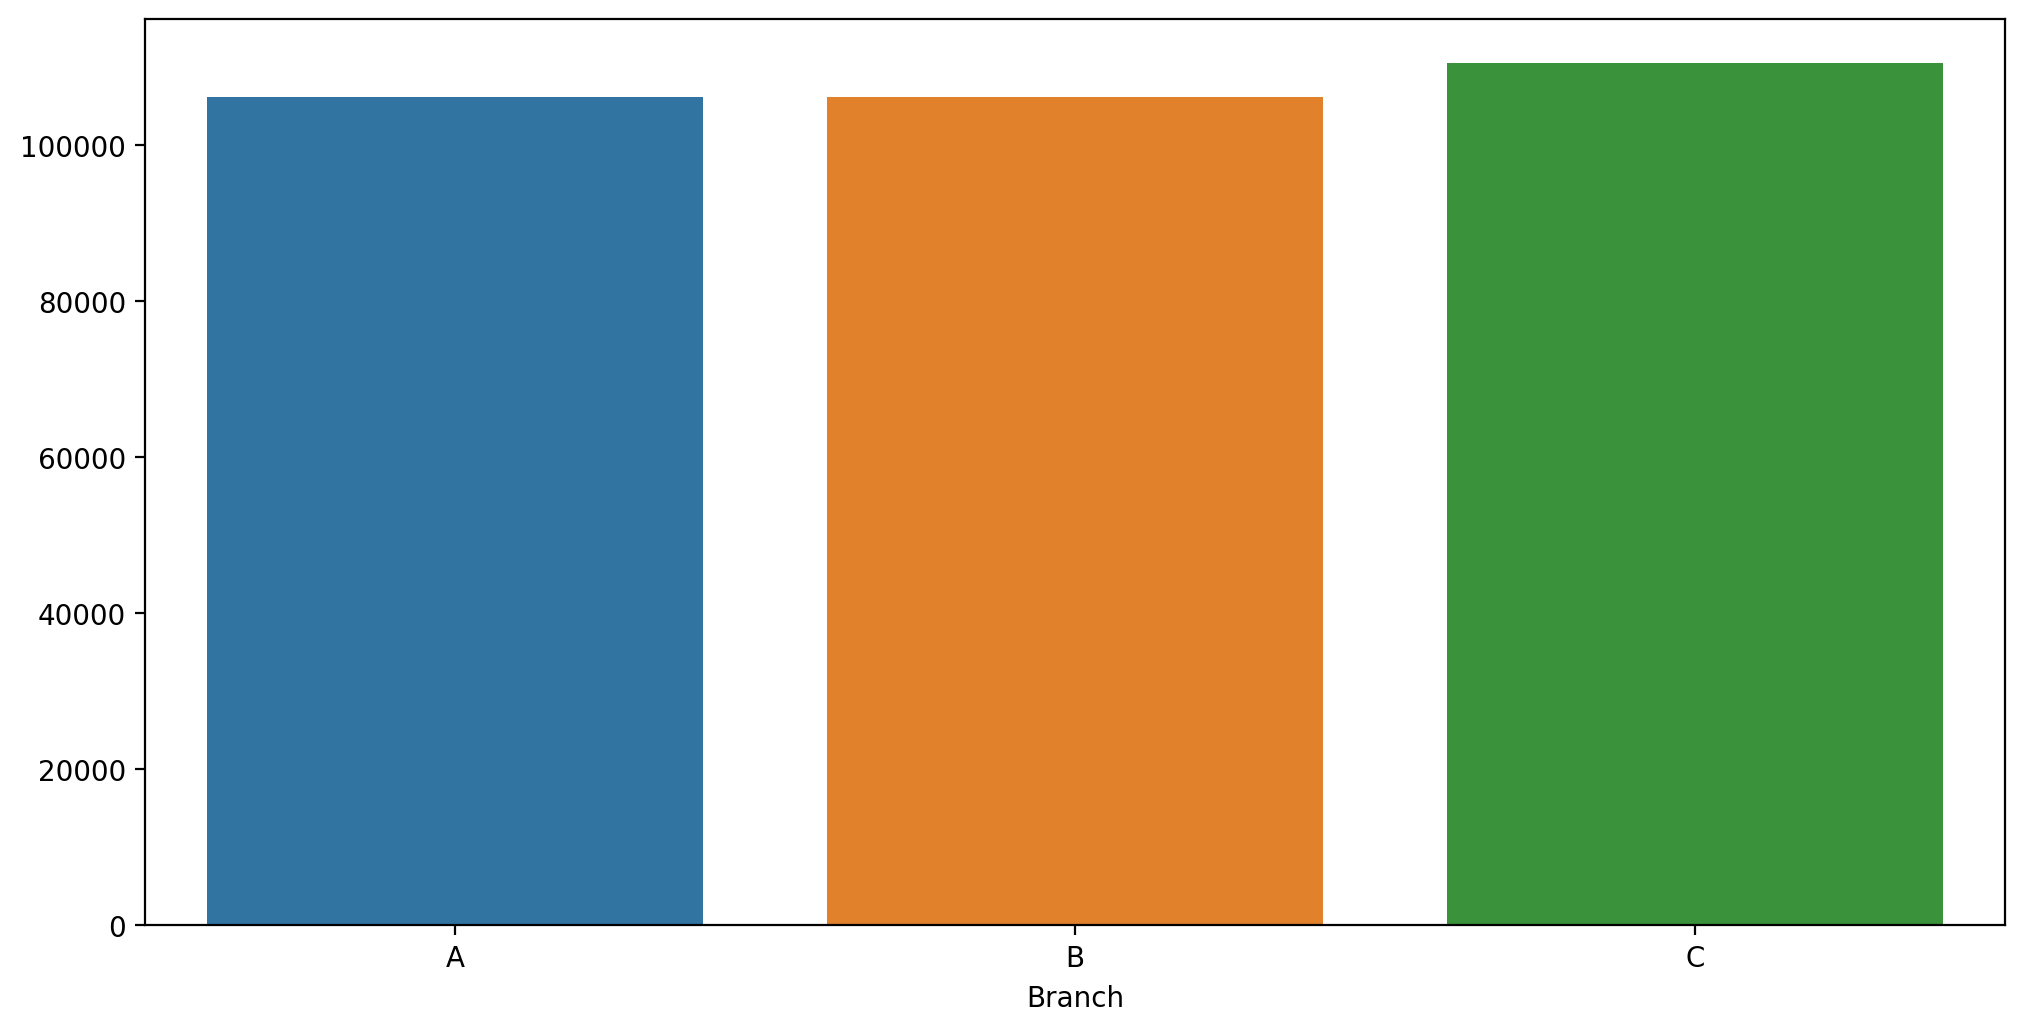

In [73]:
#bar plot to visualize the total sales by branch
plt.figure(figsize=(12,6),dpi=200)
sns.barplot(x=TotalSales.index,y=TotalSales.values)

<AxesSubplot:xlabel='Branch', ylabel='Total'>

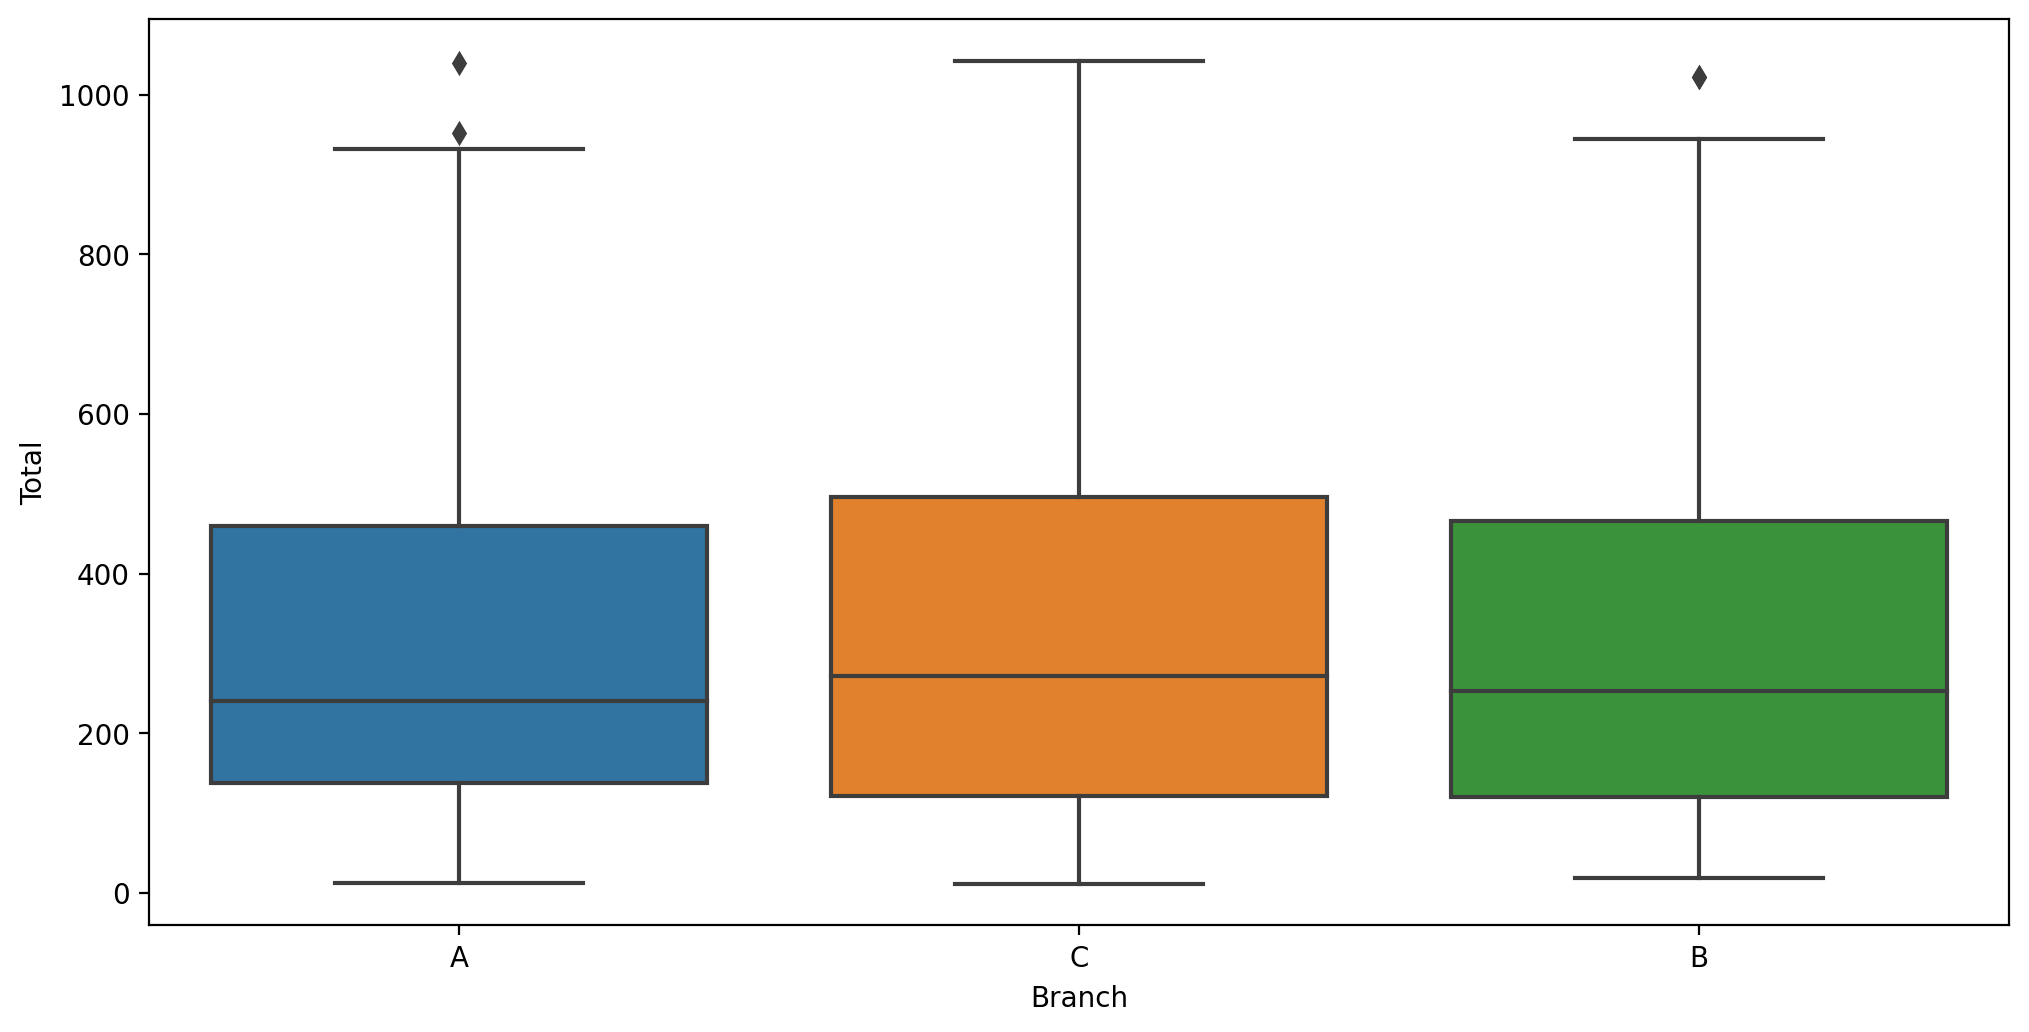

In [74]:
#box plot to visualize the total sales by branch
plt.figure(figsize=(12,6),dpi=200)
sns.boxplot(x=data['Branch'],y=data['Total'])

In [75]:
#aggregate sales across different branches
data.groupby(['Branch']).agg({'Total':['sum','mean','median']}).T

Branch                    A              B              C
Total sum     106200.370500  106197.672000  110568.706500
      mean       312.354031     319.872506     337.099715
      median     240.828000     252.882000     271.419750

- Based on the plots and tables, it can be inferred that branch C accounts for the majority of sales within a three-month period 

In [76]:
#combining Date column and Time column
data['DateTime']=data['Date']+data['Time']
#dropping unwanted columns
data.drop(columns=['Date','Time'],inplace=True)

In [77]:
#converting dateTime column to datetime format
data['DateTime']=pd.to_datetime(data['DateTime'],format='%m/%d/%Y%H:%M')

In [78]:
# adding month column to our dataset
data['Month']=data['DateTime'].dt.month

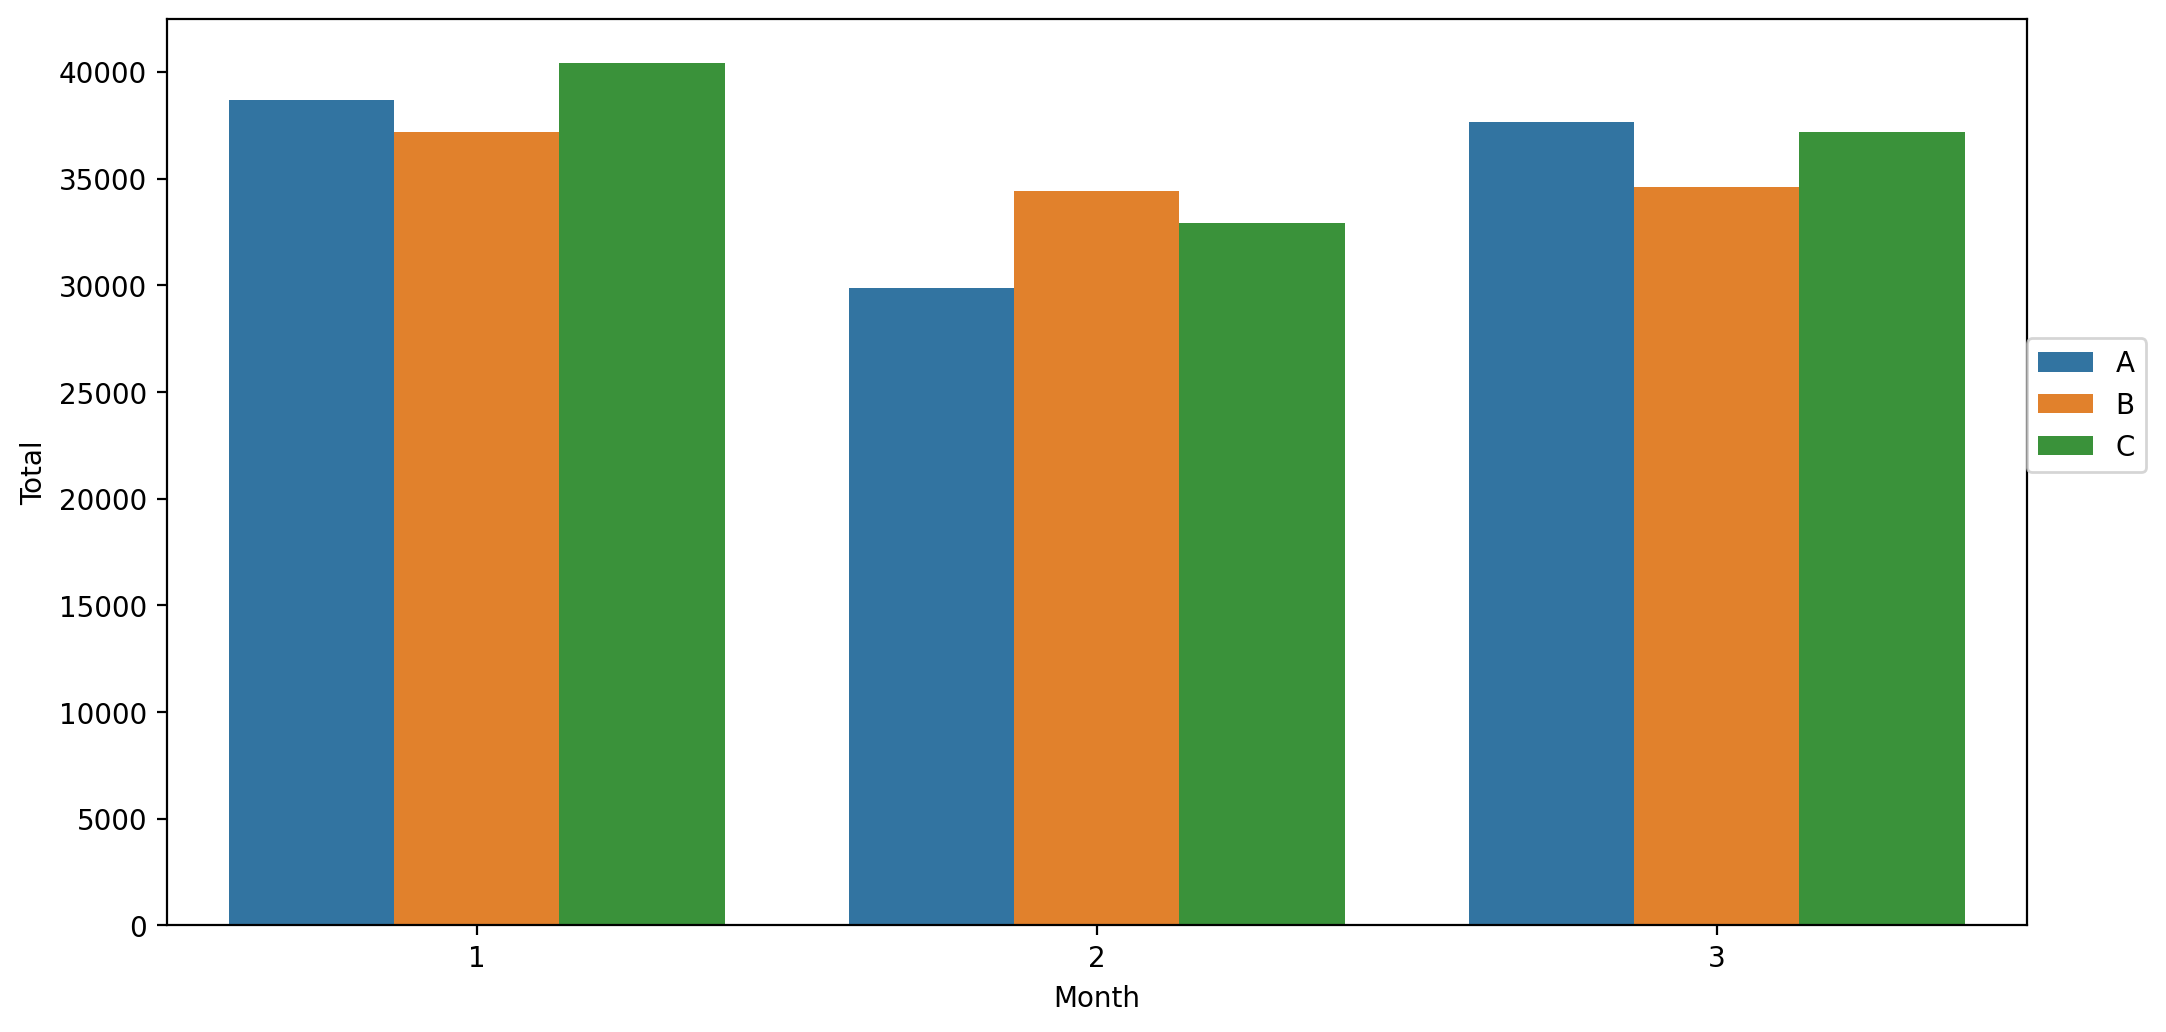

In [79]:
#Total sales across different branches within each month
monthly_sales = data.groupby(['Branch','Month']).sum()['Total'].reset_index()
#barplot
plt.figure(figsize=(12,6),dpi=200)
sns.barplot(data=monthly_sales,x='Month',y='Total',hue='Branch')
plt.legend(loc=(1,0.5))
plt.show()

In [80]:
#aggregate sales across different branches within each month
data.groupby(['Branch','Month']).agg({'Total':['sum','mean']})

Total            
                     sum        mean
Branch Month                        
A      1      38681.1285  325.051500
       2      29860.1205  317.660856
       3      37659.1215  296.528516
B      1      37176.0585  334.919446
       2      34424.2710  315.819000
       3      34597.3425  308.904844
C      1      40434.6810  331.431811
       2      32934.9825  329.349825
       3      37199.0430  350.934368

In [81]:
# you can use pivot table to represent this as well 
pivot_tab=pd.pivot_table(data,values='Total',index=['Branch','Month'],aggfunc=['sum','mean'])
pivot_tab

sum        mean
                   Total       Total
Branch Month                        
A      1      38681.1285  325.051500
       2      29860.1205  317.660856
       3      37659.1215  296.528516
B      1      37176.0585  334.919446
       2      34424.2710  315.819000
       3      34597.3425  308.904844
C      1      40434.6810  331.431811
       2      32934.9825  329.349825
       3      37199.0430  350.934368

- In the first and 3rd month branch C has most number of sales and in 2 nd month branch B has most total number of sales also average also varying in each month

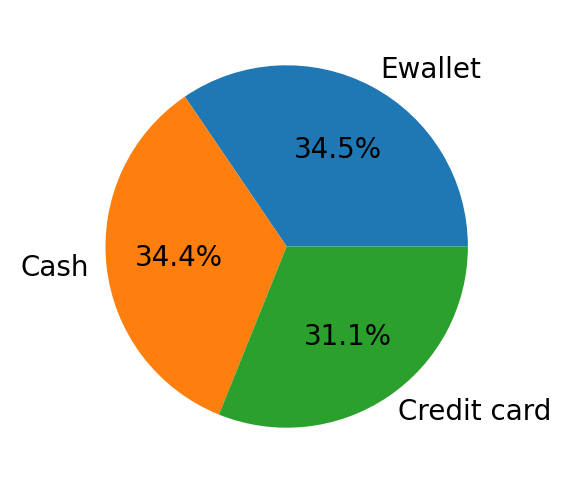

In [82]:
#Count the occurrences of each payment method
payment_count=data['Payment'].value_counts()
# creating pie chart 
plt.figure(figsize=(6,3),dpi=200)
plt.pie(x=payment_count,labels=payment_count.index,autopct='%1.1f%%');

-  Most of the Customer prefer Ewallet and cash for the payment.They may avoiding credit card to avoid debt 

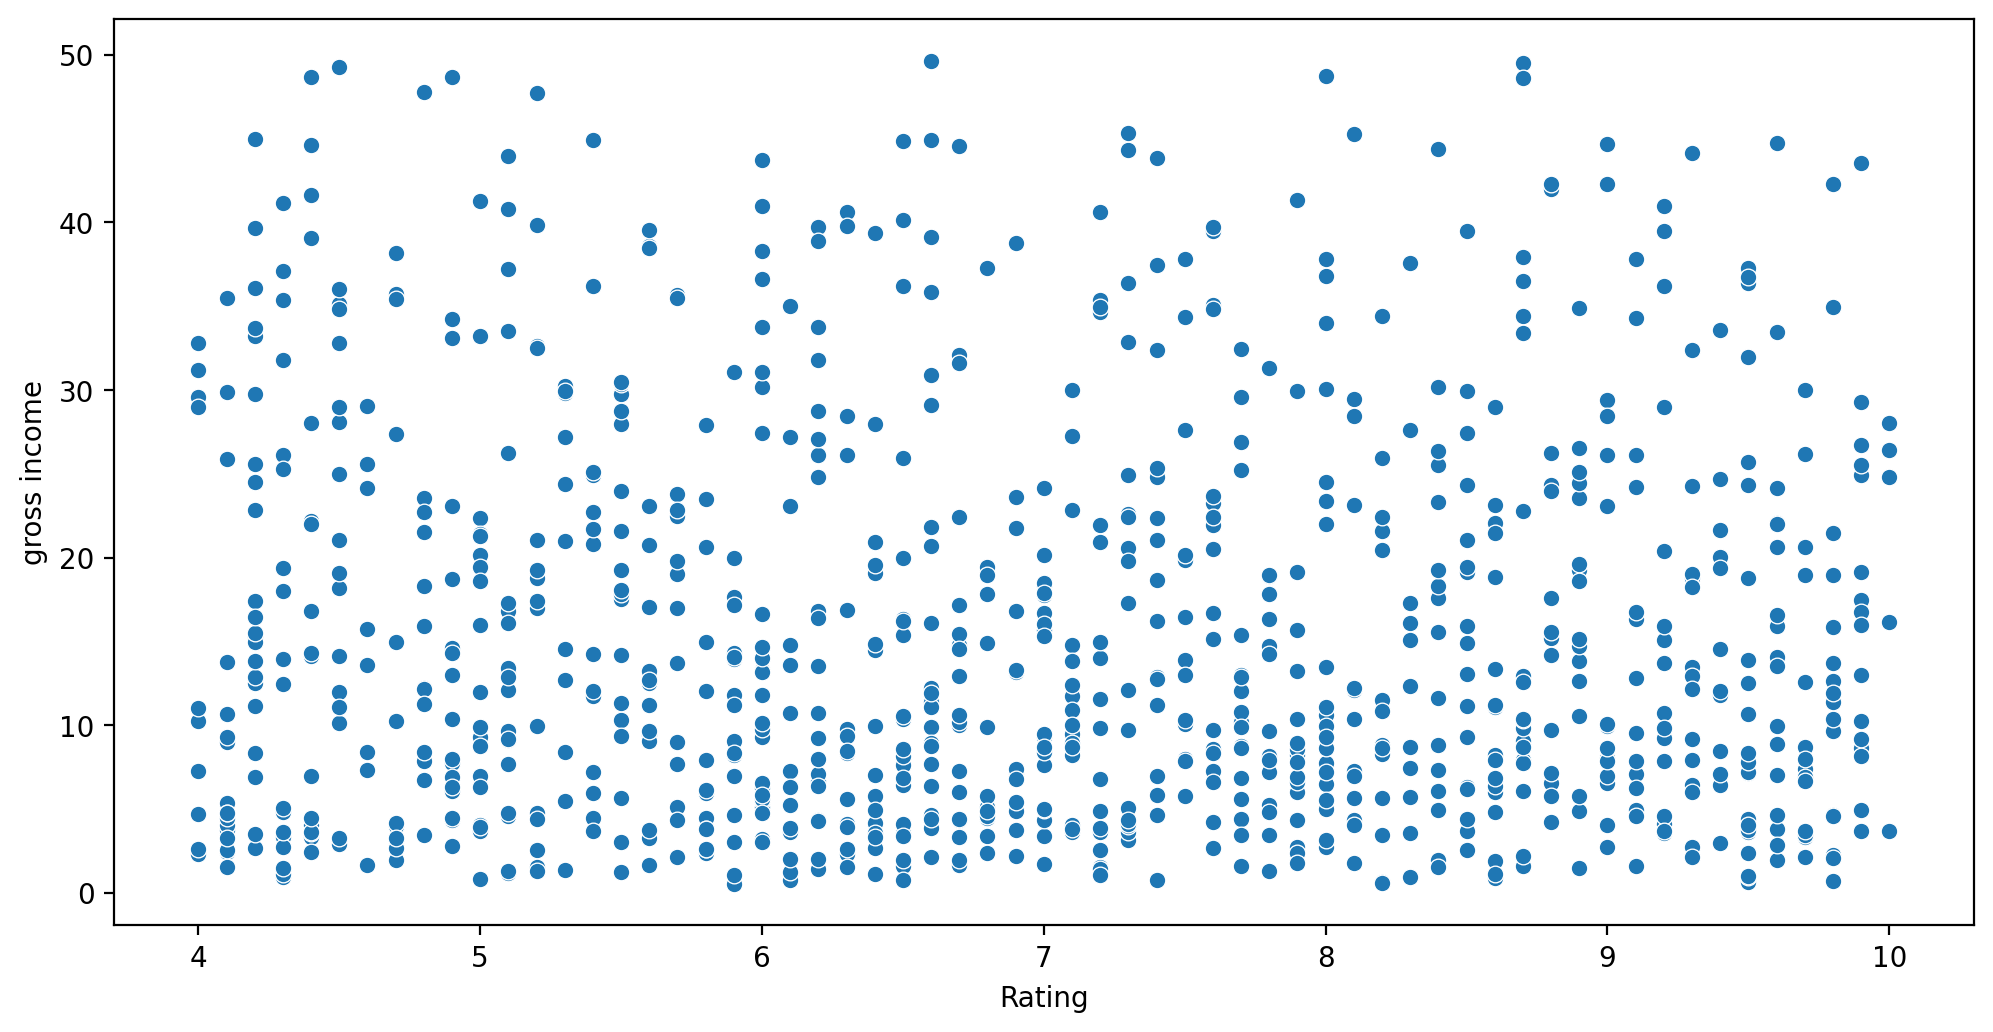

In [83]:
#Scatterplot to find relation between customer rating and gross income
plt.figure(figsize=(12,6),dpi=200)
sns.scatterplot(x=data['Rating'],y=data['gross income'])
plt.show()

- There is no relation visible in customer rating and gross income

<AxesSubplot:xlabel='Branch', ylabel='gross income'>

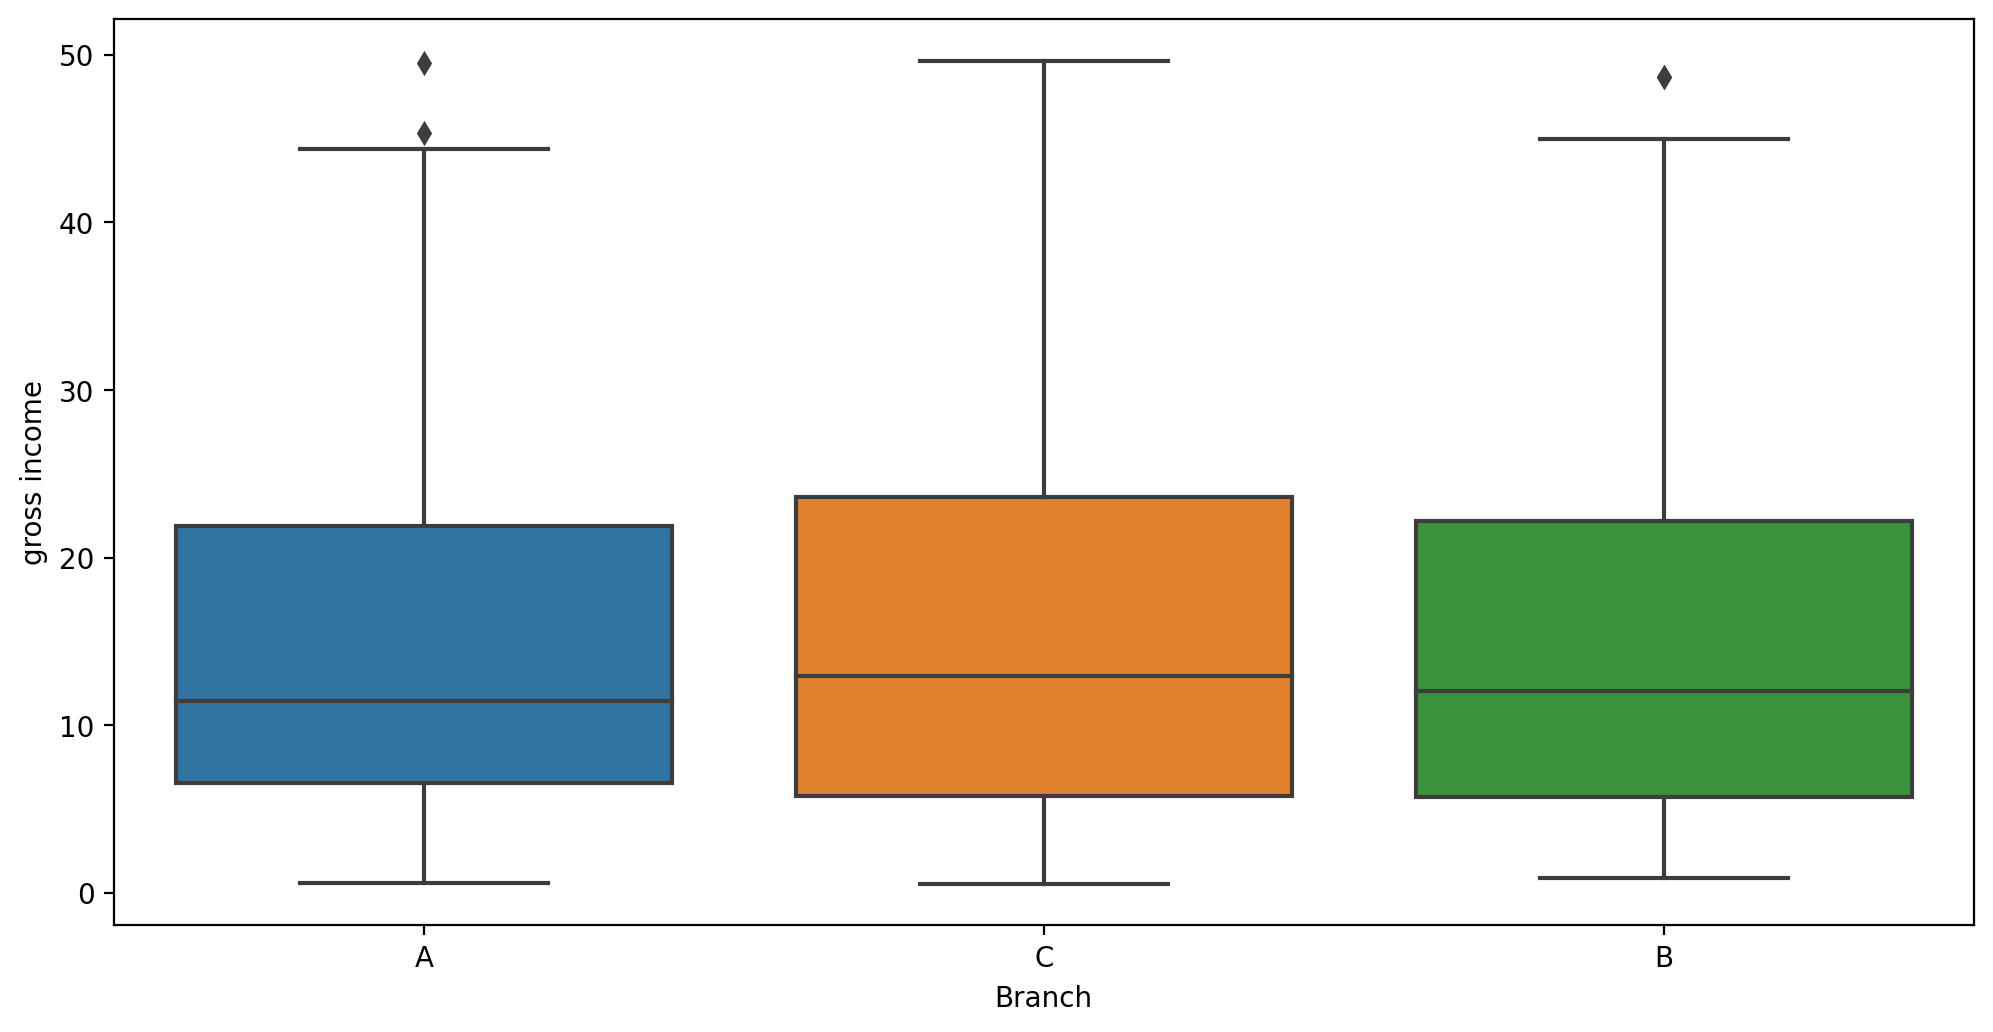

In [84]:
#box plot x as 'Branch' and y as 'gross income' show the distribution of gross income across different branches of the supermarket.
plt.figure(figsize=(12,6),dpi=200)
sns.boxplot(x=data['Branch'],y=data['gross income'])

In [85]:
# pivot table of each branches aggergate gross income
pd.pivot_table(data,values='gross income',index='Branch',aggfunc=['sum','mean','median'])

,sum,mean,median
,gross income,gross income,gross income
Branch,,,
A,5057.1605,14.874001,11.46800
B,5057.0320,15.232024,12.04200
C,5265.1765,16.052367,12.92475


- Branch C is making more profit compared to other branches also branch B and A is making almost same profit but average income of branch B is slightly higher than A.

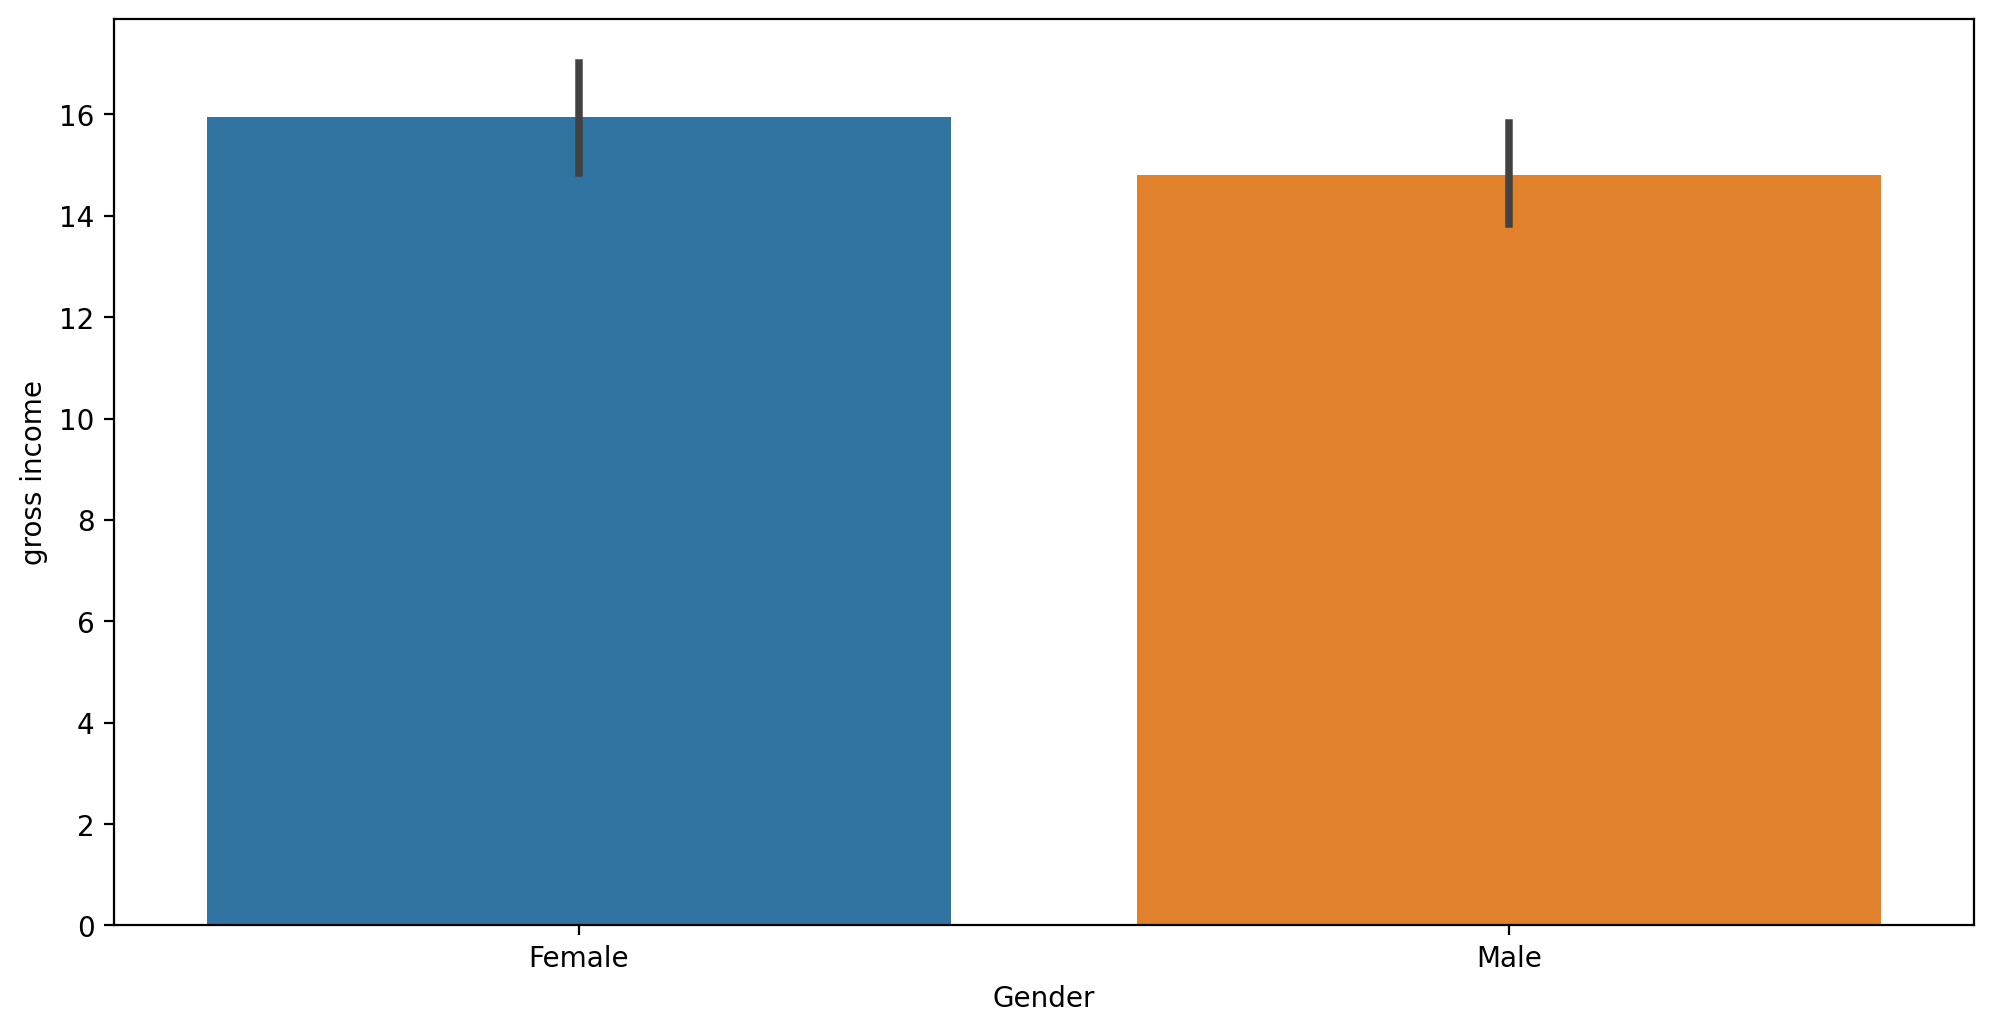

In [86]:
# barplot
plt.figure(figsize=(12,6),dpi=200)
sns.barplot(x=data['Gender'],y=data['gross income'])
plt.show()

In [87]:
# Grouping the data by 'Gender' and calculating various statistics on 'gross income'
data.groupby('Gender').agg({'gross income' :['sum','mean','max','min','count']})

gross income                                
                sum       mean    max     min count
Gender                                             
Female     7994.425  15.956936  49.65  0.6045   501
Male       7384.944  14.799487  49.49  0.5085   499

From this we cant conclude wheather there is realtionship between gender and gross income so we are performing analysis of variance(ANOVA)
to determine the relation

In [88]:
import scipy.stats as stats

# Assuming you have two groups of gross income: female and male
#Null hypothesis(HO): The mean gross income is the same for all gender groups.
#Alternate hypothesis(H1): The mean gross income differs at least between one pair of gender groups.
#level of significace(alpha) =0.05
Female = data[data['Gender'] == 'Female']['gross income']
Male = data[data['Gender'] == 'Male']['gross income']

# Perform ANOVA test
statistic, p_value = stats.f_oneway(Female, Male)

print("ANOVA Results")
print("Statistic:", statistic)
print("p-value:", p_value)


ANOVA Results
Statistic: 2.4464921507254607
p-value: 0.11810484577140822


- Hence p-value is greater than the chosen level of significance (e.g., 0.05), we fail to reject the null hypothesis. In this case, we do not have sufficient evidence to conclude that there is a relationship between gender and gross income based on the ANOVA test.However, it's important to note that failing to reject the null hypothesis does not necessarily mean there is no relationship between gender and gross income. It simply means that we do not have strong enough evidence to support a significant relationship.To further investigate the potential relationship, additional tests or analyses may be required
- satatistic is the F-value of the F test

In [89]:
# count of number of products
data['Product line'].nunique()
# name of all the products
data['Product line'].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

<AxesSubplot:xlabel='Product line', ylabel='gross income'>

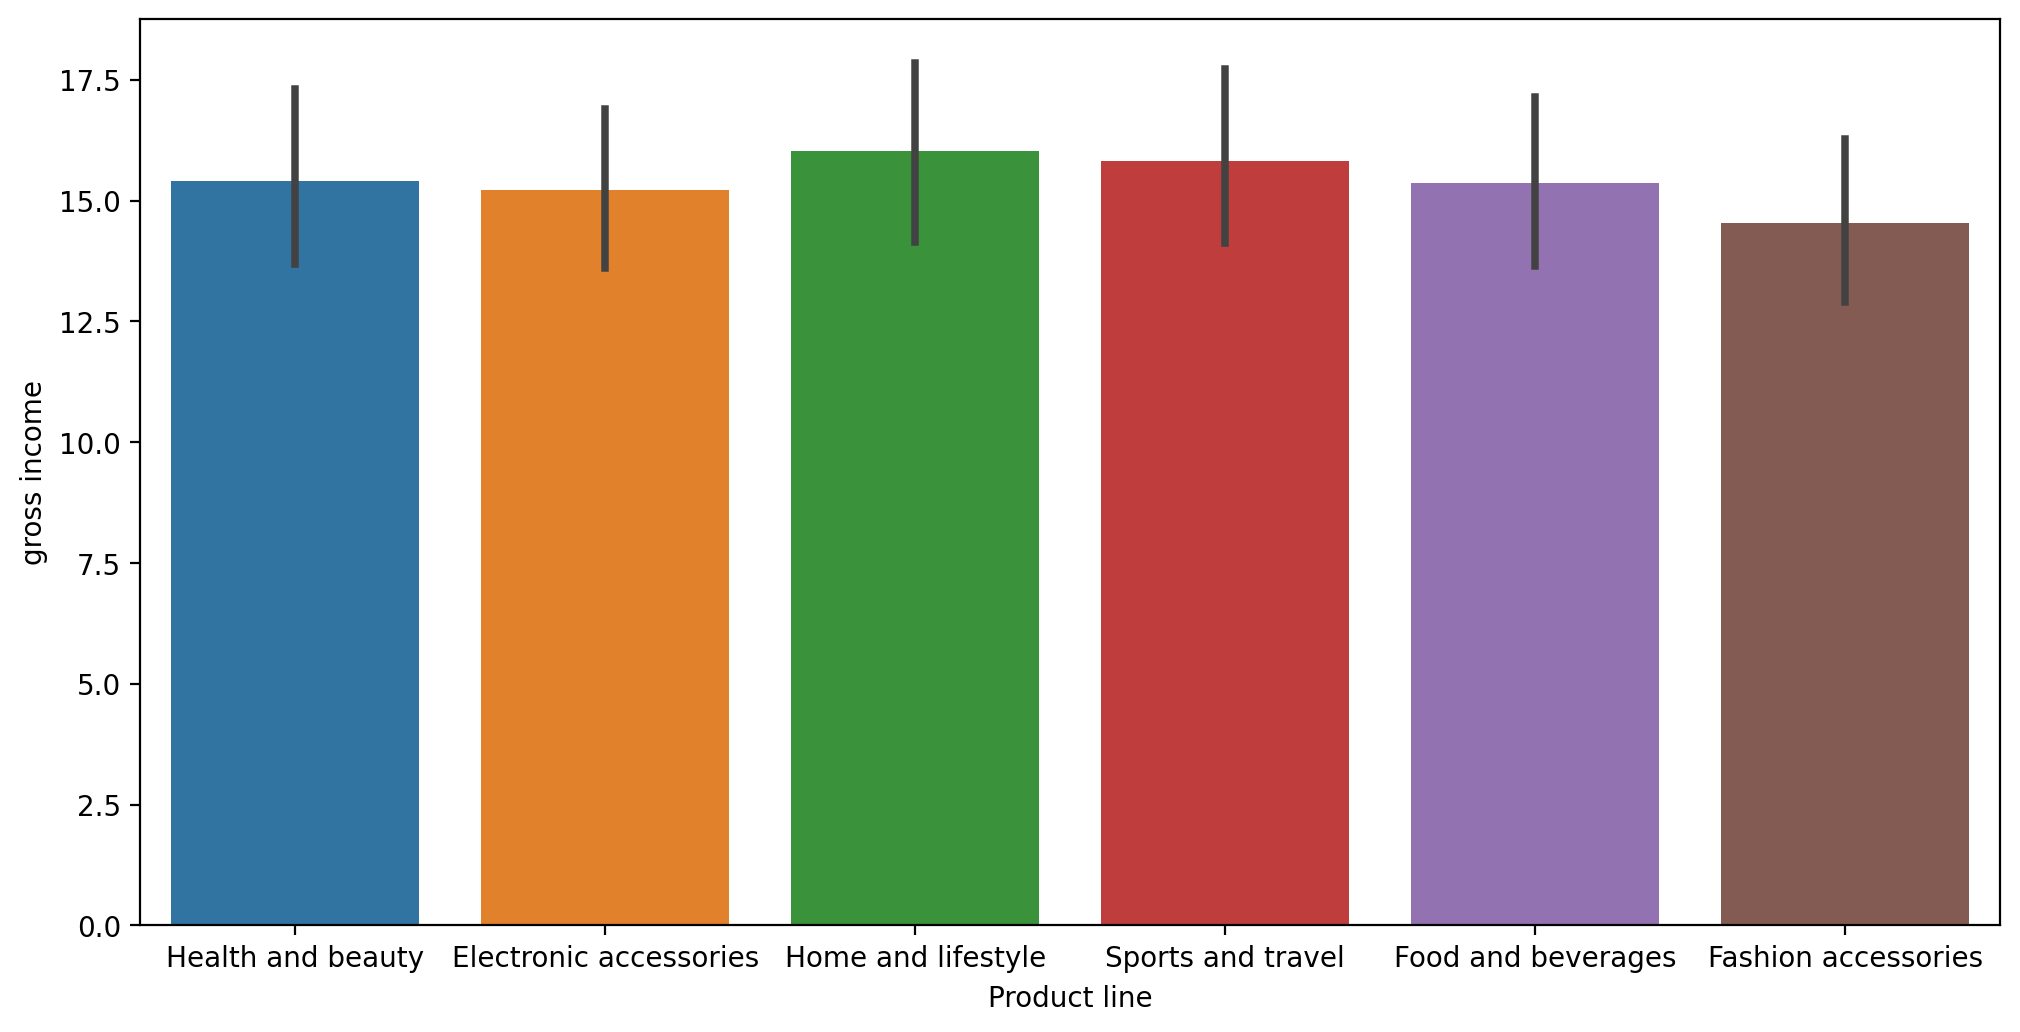

In [90]:
# bar plot to visualize the relationship between 'Gender' and 'gross income'
plt.figure(figsize=(12,6),dpi=200)
sns.barplot(x=data['Product line'],y=data['gross income'])

In [91]:
# Grouping the data by 'Product Line' and calculating various statistics on 'gross income'
data.groupby('Product line').agg({'gross income' :['sum','mean','count']})

gross income                 
                                sum       mean count
Product line                                        
Electronic accessories    2587.5015  15.220597   170
Fashion accessories       2585.9950  14.528062   178
Food and beverages        2673.5640  15.365310   174
Health and beauty         2342.5590  15.411572   152
Home and lifestyle        2564.8530  16.030331   160
Sports and travel         2624.8965  15.812630   166

- Based on the sum of gross income, we can see that the 'Food and beverages' product line generates the most income with a total of 2673.5640. Therefore, the 'Food and beverages' product line generates the highest income among all the product lines.
- Fashion accessories are the most purchased product 

   Gender       Total
0  Female  167882.925
1    Male  155083.824


<AxesSubplot:xlabel='Gender', ylabel='Total'>

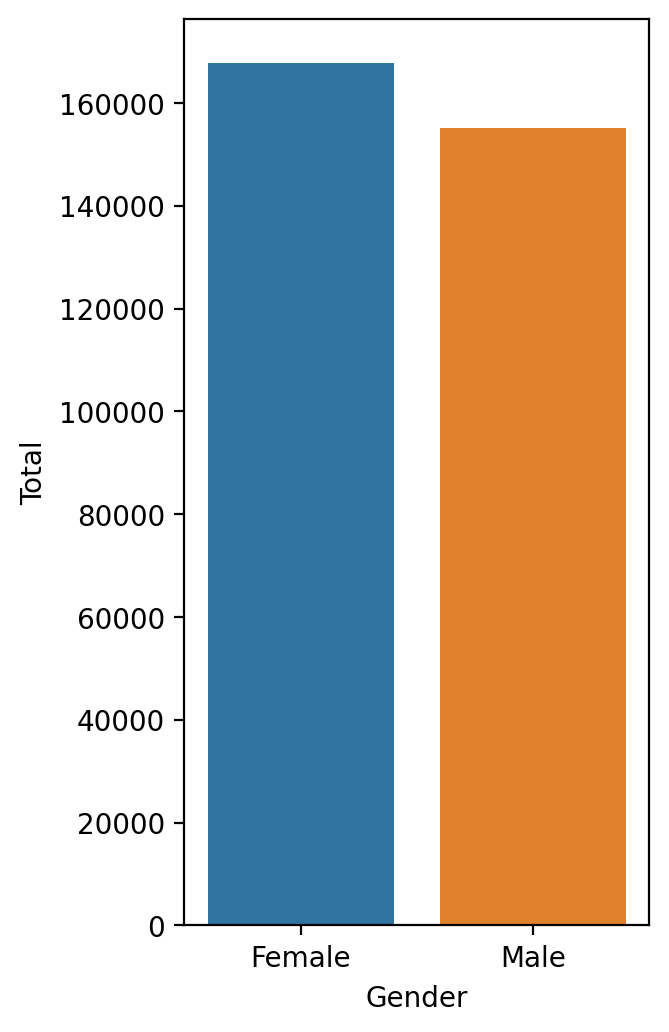

In [92]:
#Grouping the data by 'Gender' and calculating the sum of 'Total'
spending_byGender=data.groupby('Gender').sum()['Total'].reset_index()
print(spending_byGender)
#bar plot to visualize spending by gender
plt.figure(figsize=(3,6),dpi=200)
sns.barplot(data=spending_byGender,x='Gender',y='Total')

Females are spending more compared to Male.

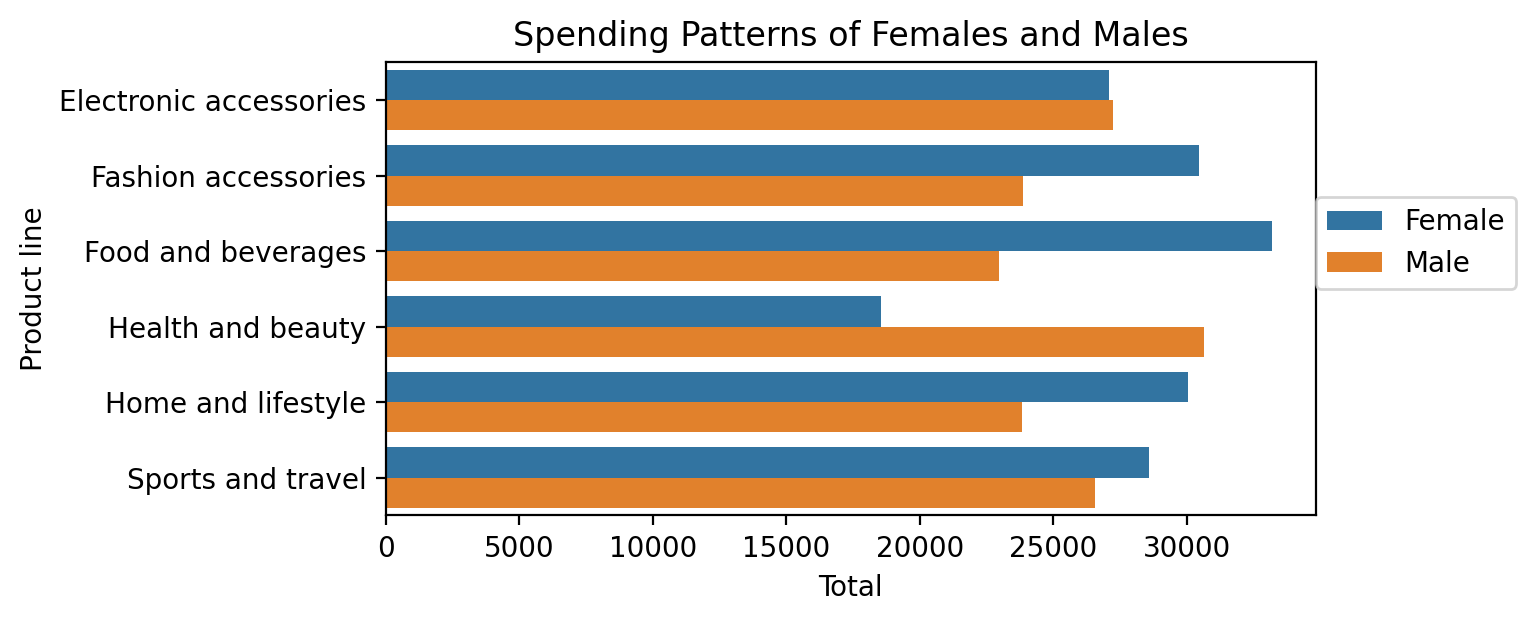

In [93]:

# Grouping the data by 'Gender' and 'Product line' and calculating the sum of 'Total'
Spending_By_products=data.groupby(['Gender','Product line']).sum()['Total'].reset_index()

# Creating a bar plot to visualize spending patterns of females and males by product line
plt.figure(figsize=(6,3),dpi=200)
sns.barplot(data=Spending_By_products,y='Product line',x='Total',hue='Gender')
plt.title('Spending Patterns of Females and Males')
plt.legend(loc=(1,0.5))

In [94]:
# Create a pivot table from the 'data' dataframe
# Calculate the sum of the 'Total' column
# Set the 'Product line' column as the index
# Set the 'Gender' column as the columns
pivot_tab=pd.pivot_table(data,values='Total',index='Product line',columns='Gender',aggfunc='sum')

# Sort the pivot table by the 'Female' column in descending order
# This will arrange the rows in the pivot table based on the sum of 'Total' for females in each product line
pivot_tab.sort_values(by='Female',ascending=False)

Gender,Female,Male
Product line,,
Food and beverages,33170.9175,22973.9265
Fashion accessories,30437.4000,23868.4950
Home and lifestyle,30036.8775,23825.0355
Sports and travel,28574.7210,26548.1055
Electronic accessories,27102.0225,27235.5090
Health and beauty,18560.9865,30632.7525


In [95]:
# Sort the pivot table by the 'Male' column in descending order
# This will arrange the rows in the pivot table based on the sum of 'Total' for Males in each product line
pivot_tab.sort_values(by='Male',ascending=False)

Gender,Female,Male
Product line,,
Health and beauty,18560.9865,30632.7525
Electronic accessories,27102.0225,27235.5090
Sports and travel,28574.7210,26548.1055
Fashion accessories,30437.4000,23868.4950
Home and lifestyle,30036.8775,23825.0355
Food and beverages,33170.9175,22973.9265


- Based on the bar plot and pivot table depicting the spending patterns of females and males by product line, it can be observed that females tend to spend more compared to males
   -There could be several factors contributing to this observation  
   
   - Shopping Preferences: Females may have different shopping preferences compared to males, which can lead to higher               spending.here we can see Females are spending more on the products like Food and beverages,Fashion accessories and Home and     lifestyle where males spends on Health and beauty,Electronic accessories and Sports and travel.
   - Shopping Habits: Females might engage in more frequent shopping trips or allocate a larger portion of their budget towards     shopping, leading to higher overall spending.

d:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


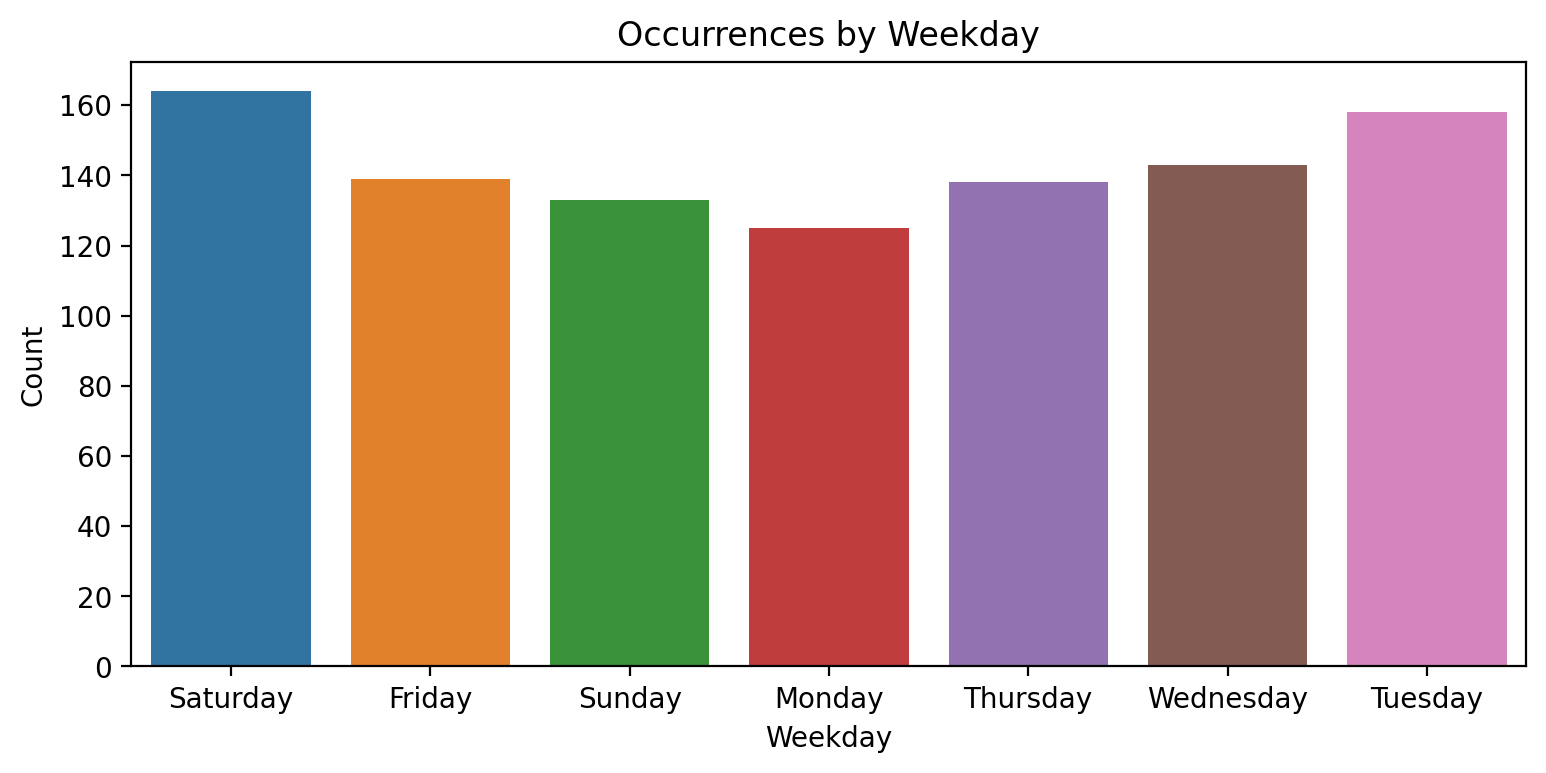

In [96]:
# Extract weekday from 'DateTime' column using dt.day_name() and plot the countplot
plt.figure(figsize=(9, 4), dpi=200)
sns.countplot(data['DateTime'].dt.day_name())
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.title('Occurrences by Weekday')
plt.show()

Sales are highest on Saturdays, likely due to it being the weekend when people have more free time for shopping. Interestingly, Tuesdays are a close second in terms of sales, possibly because people have settled into their weekly routines and are more likely to engage in shopping activities. Mondays have the lowest sales, likely because it marks the beginning of the workweek, and people may be focused on getting back to work and not prioritizing shopping.

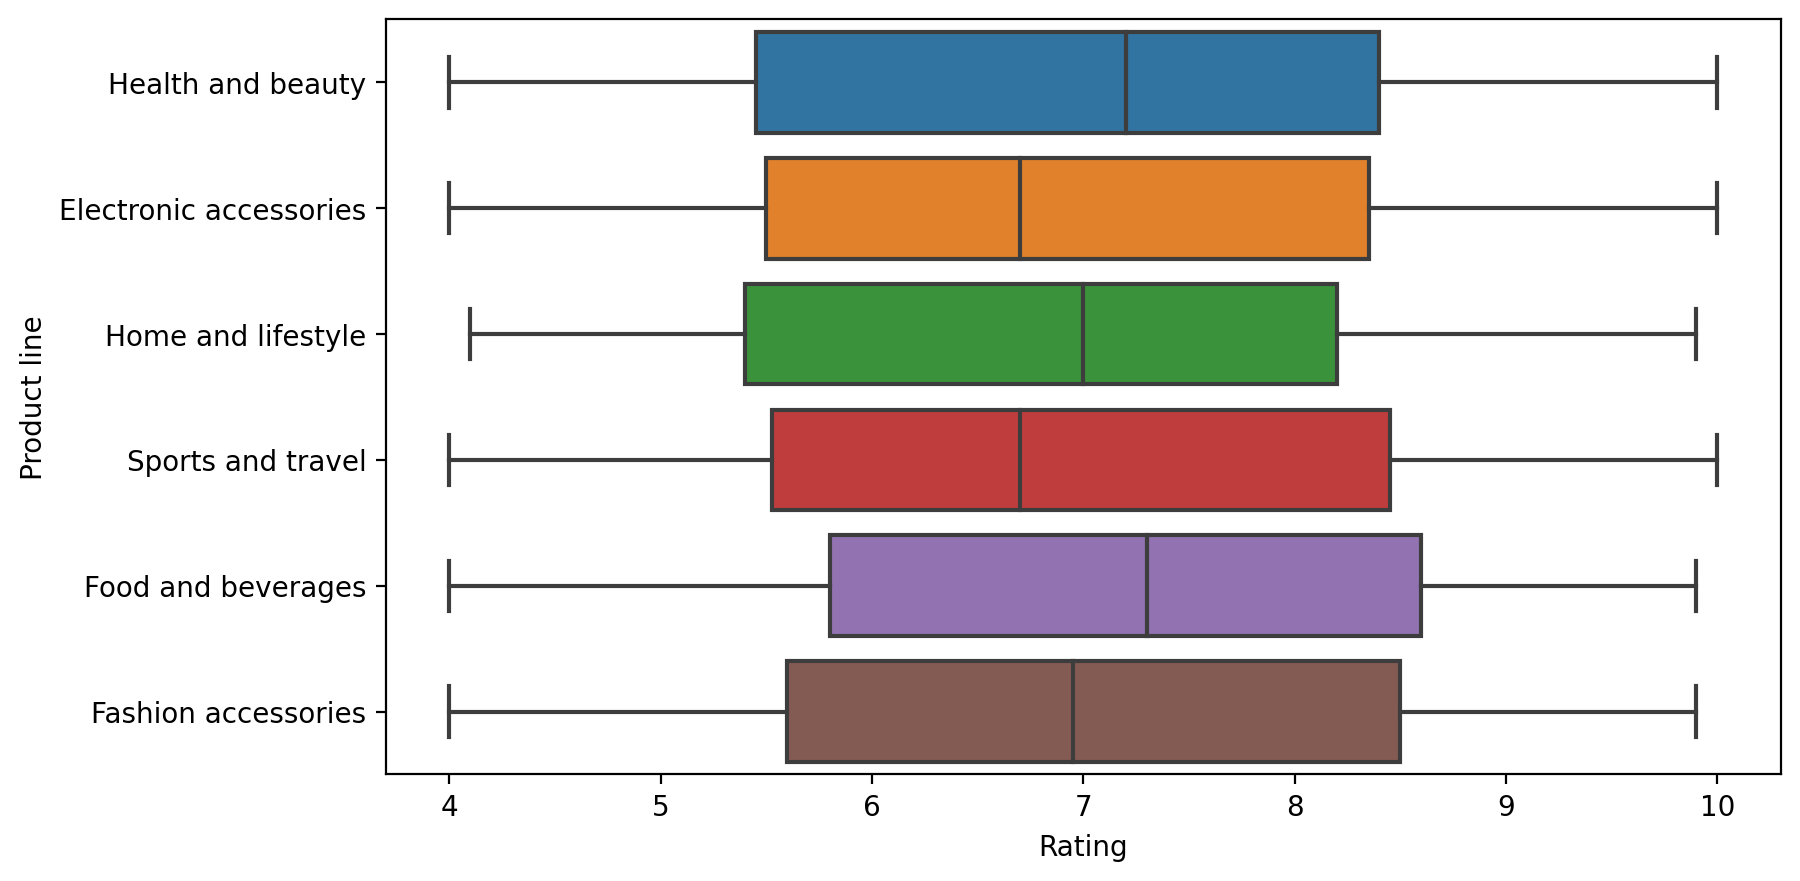

In [97]:
# creating box plot
plt.figure(figsize=(9,5),dpi=200)
sns.boxplot(y=data['Product line'],x=data['Rating'])
plt.show()

 Food and Beverages' and 'Health and Beauty' products consistently receive high ratings compared to all other product categories. This could be attributed to several reasons. Firstly, the quality and taste of food and beverages play a significant role in customer satisfaction, leading to positive reviews. Additionally, health-conscious consumers prioritize products that promote well-being, which enhances the ratings of 'Health and Beauty' items. Moreover, these categories often involve products that cater to personal preferences and individual needs, allowing for a more personalized and satisfactory experience, resulting in higher ratings.

<AxesSubplot:xlabel='Quantity', ylabel='Product line'>

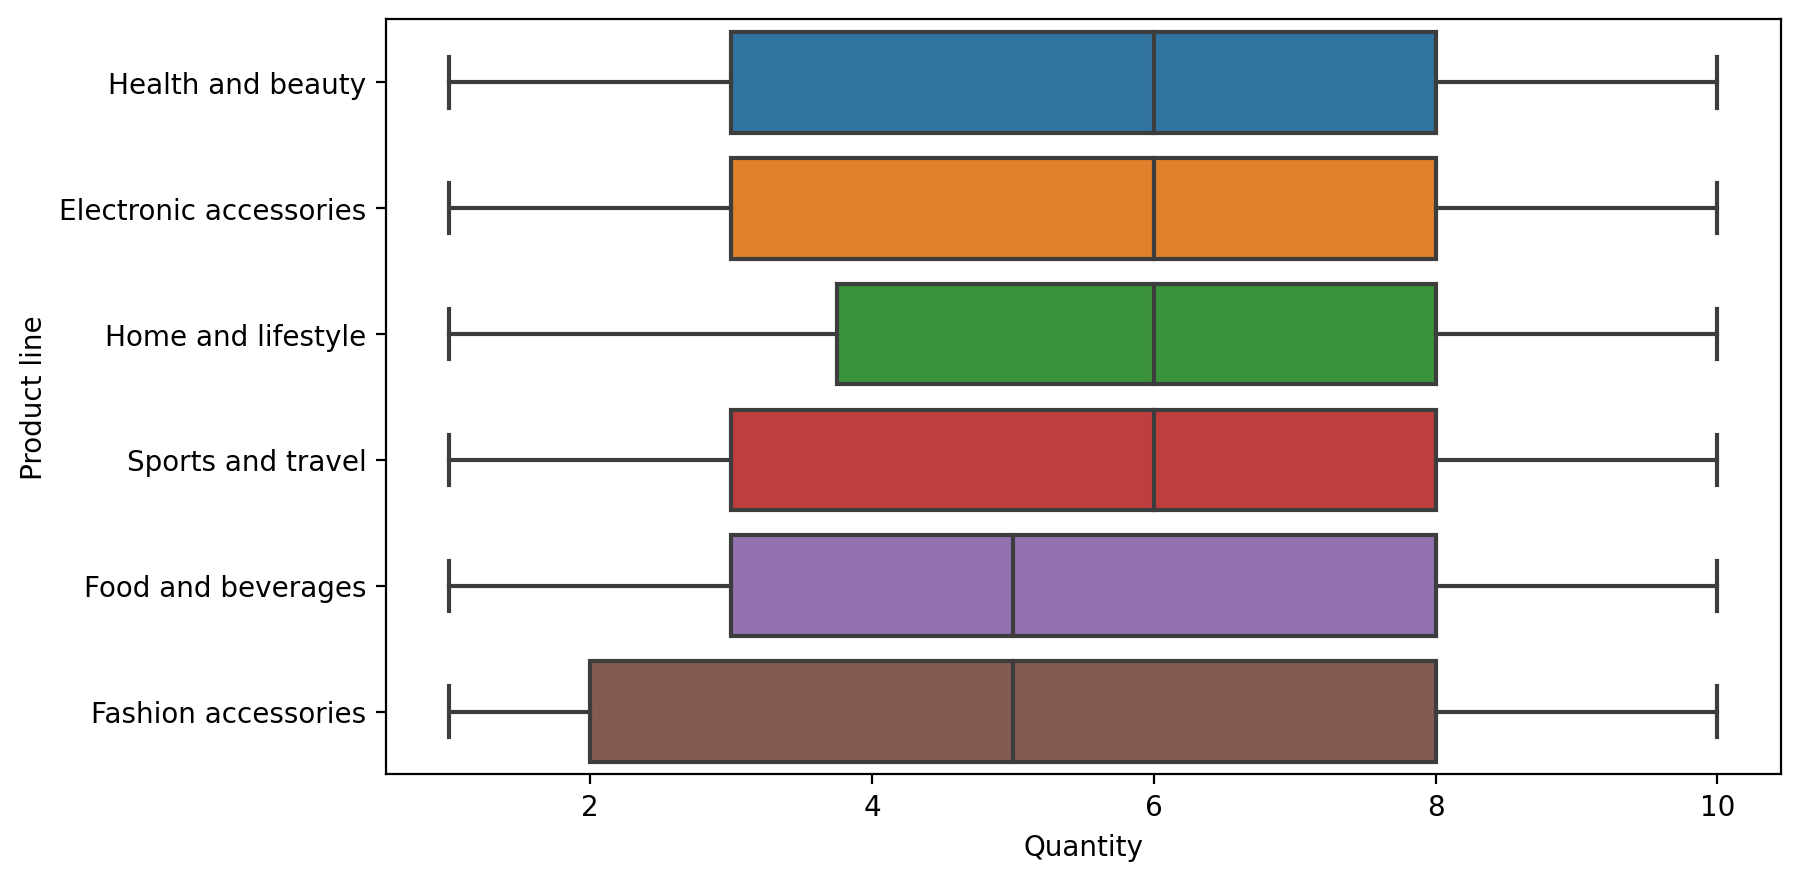

In [98]:
# creating boxplot
plt.figure(figsize=(9,5),dpi=200)
sns.boxplot(y=data['Product line'],x=data['Quantity'])

In [99]:
# Group the data by 'Product line' and calculate the sum and mean of 'Quantity' for each group
data.groupby('Product line').agg({'Quantity':['sum','mean']})

Quantity          
                            sum      mean
Product line                             
Electronic accessories      971  5.711765
Fashion accessories         902  5.067416
Food and beverages          952  5.471264
Health and beauty           854  5.618421
Home and lifestyle          911  5.693750
Sports and travel           920  5.542169

- Among the different product lines, electronic accessories have the highest total quantity sold (971) and the highest average quantity per transaction (5.71). This suggests a strong demand for electronic accessories among customers.
- Food and beverages also show significant sales, with a total quantity sold of 952 and an average quantity per transaction of 5.47. This indicates a consistent demand for food and beverages.
- Fashion accessories, home and lifestyle products, and sports and travel products also have considerable sales, with average quantities per transaction ranging from 5.07 to 5.69.
- In summary, electronic accessories, food and beverages, and health and beauty products appear to be the top-performing product lines in terms of quantity sold, indicating strong customer interest and demand in these categories.

In [100]:
# Count the number of unique hours in the `Hour` column
data['Hour']=data['DateTime'].dt.hour
data['Hour'].nunique()

11

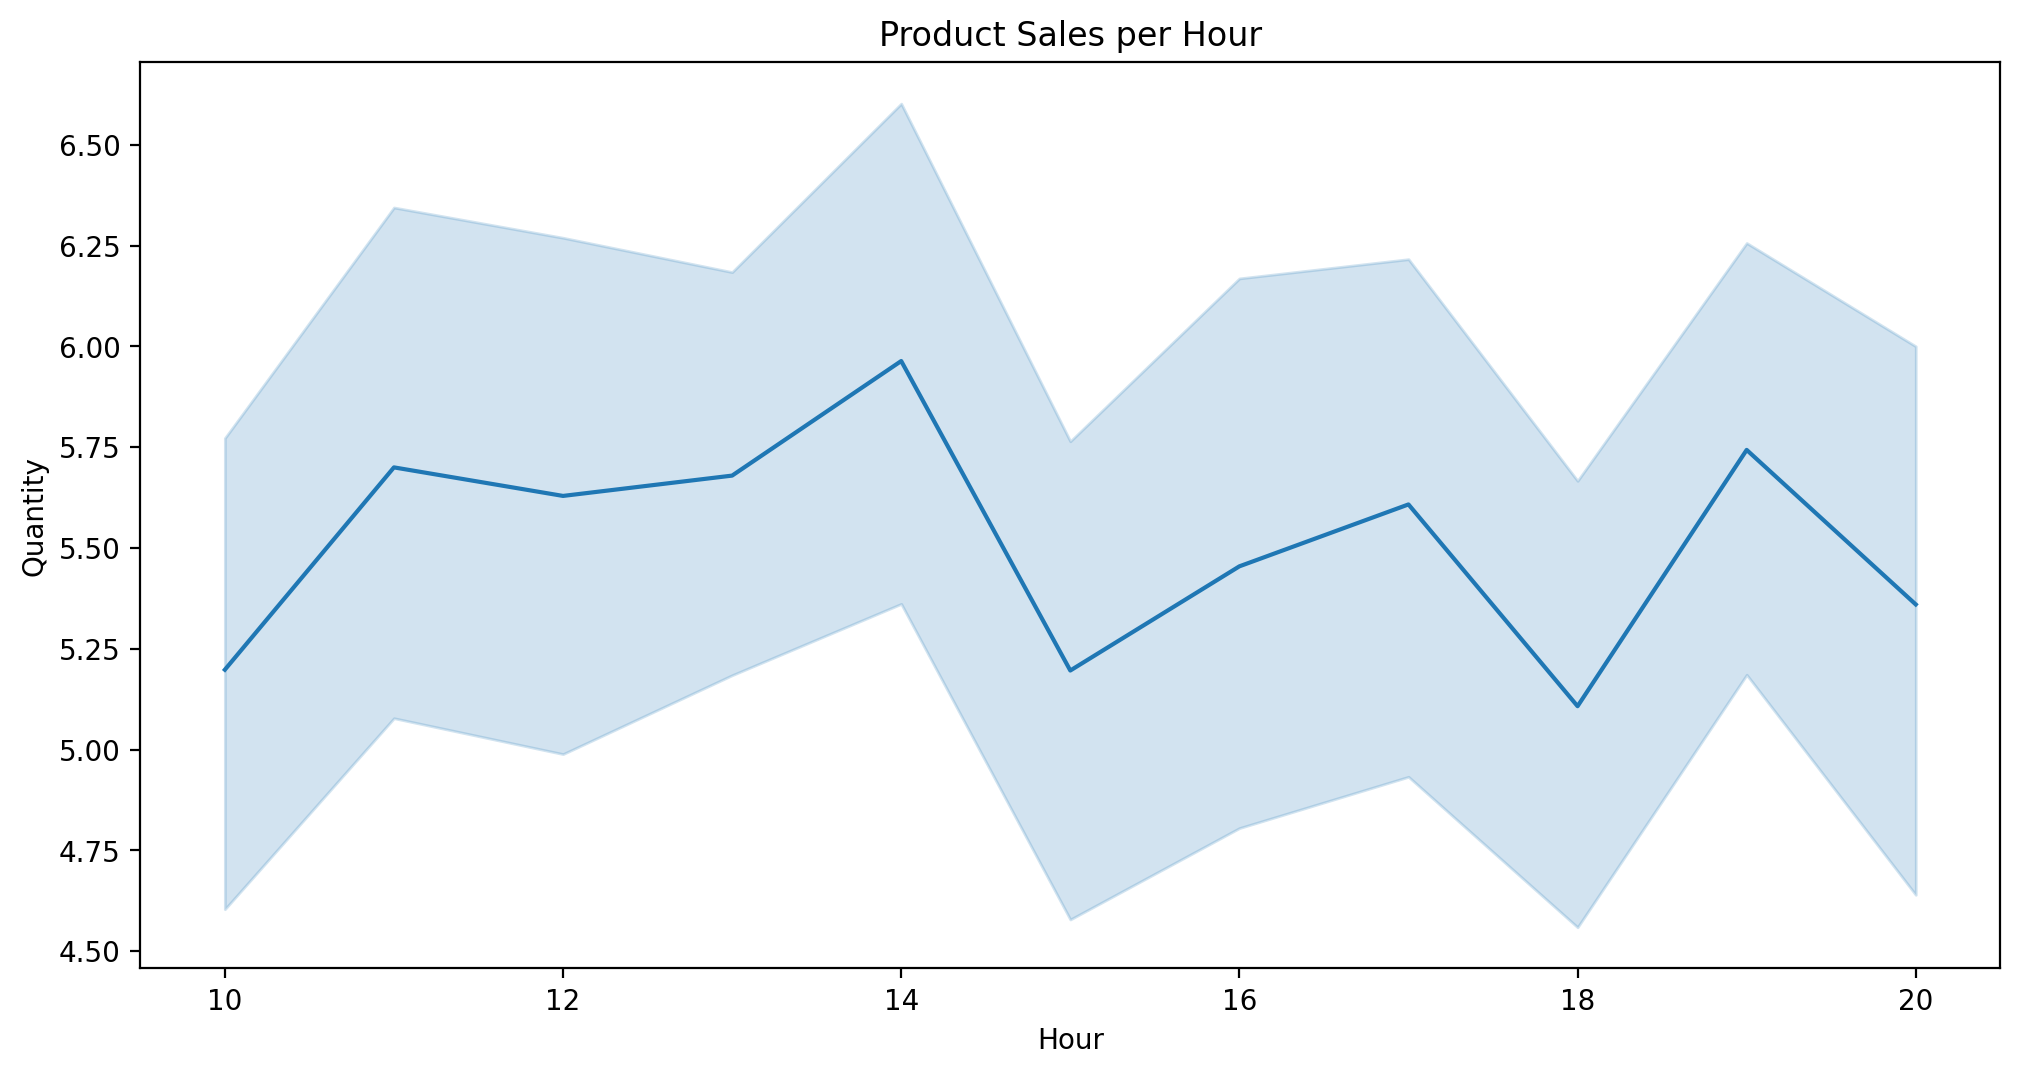

In [101]:
# line plot of product sales per hour
plt.figure(figsize=(12,6),dpi=200)
sns.lineplot(x=data["Hour"],  y = data['Quantity'])
plt.title("Product Sales per Hour")
plt.show()

In the plot Peak is observed in the 14th hour That is 2 pm of the day. Hence sales is typically higher in the afternoons because of lunch time

d:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


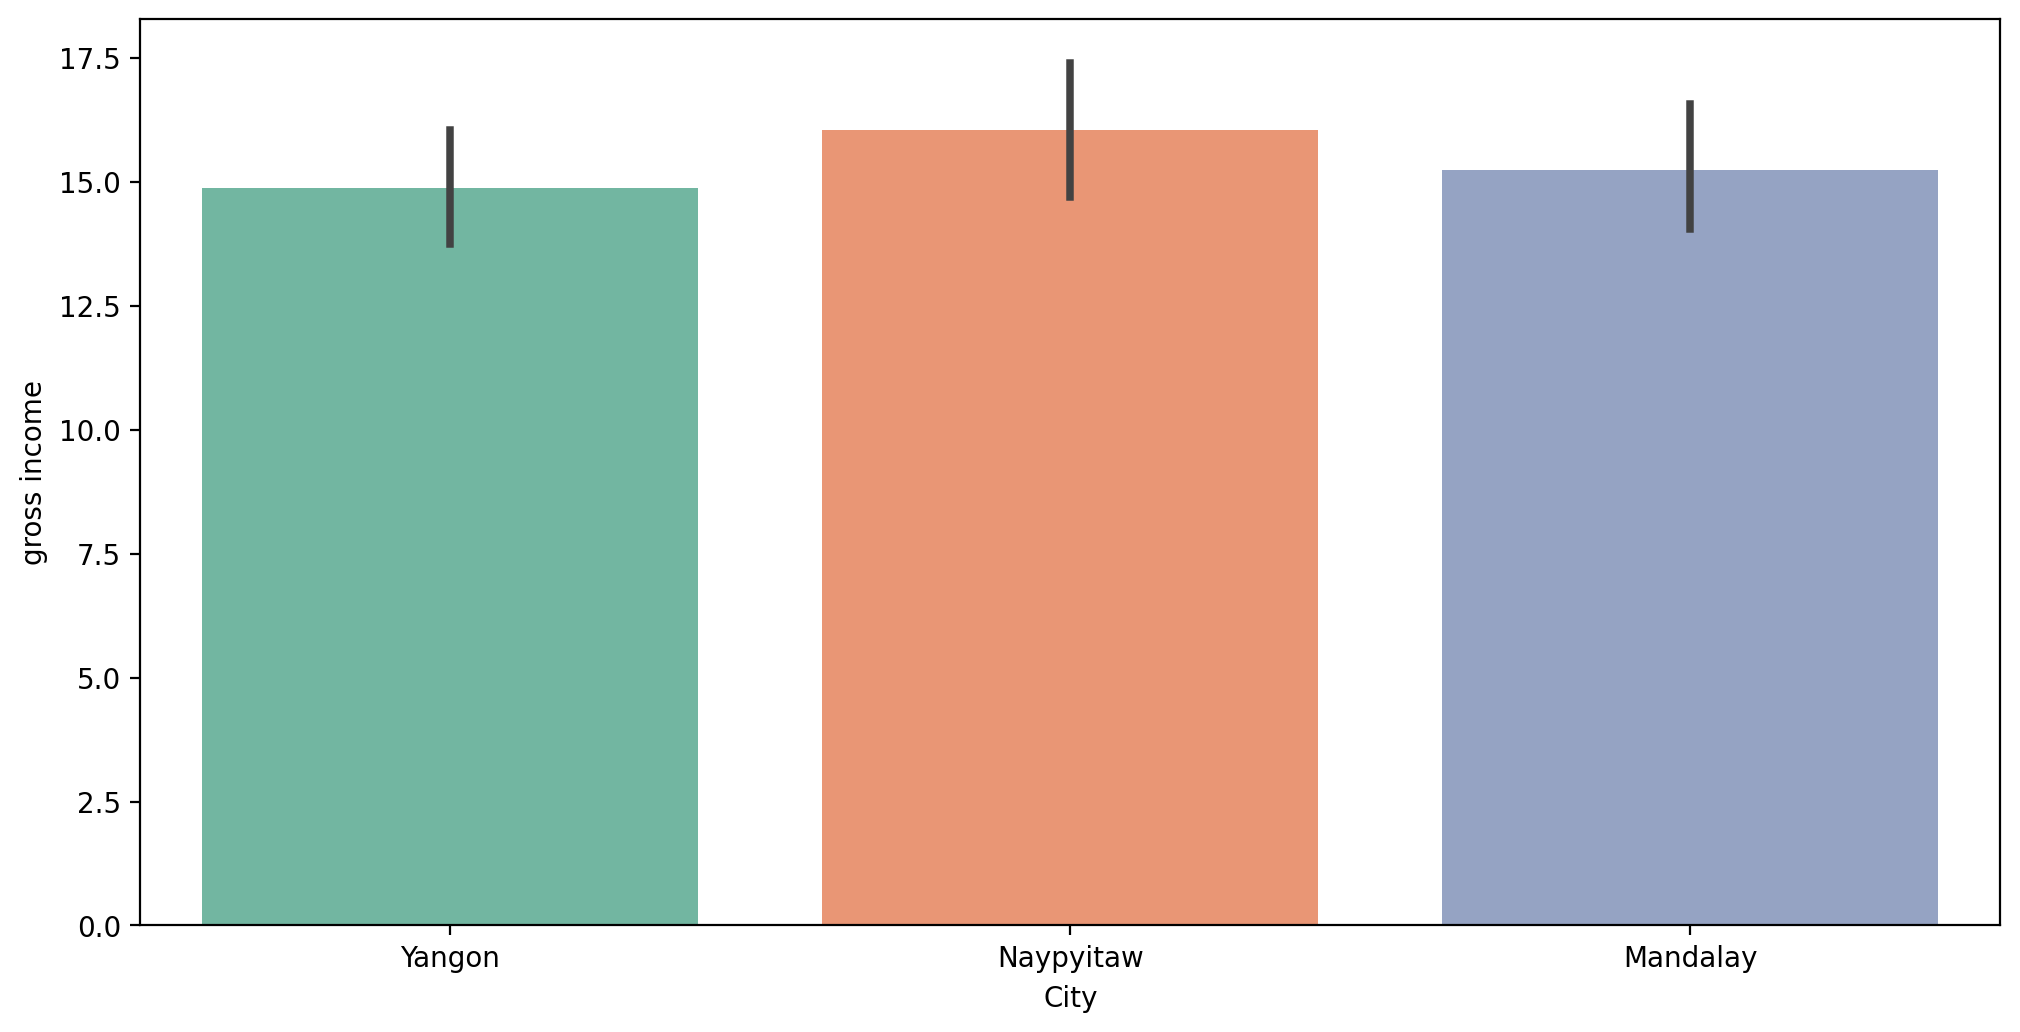

In [102]:
# bar plot of the gross income by city.
plt.figure(figsize=(12,6),dpi=200)
sns.barplot(data['City'],data['gross income'],palette='Set2')
plt.show()

Here Naypyitaw is the most profitable city, hence the expansion should be based on this city